Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [ ]:
#Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Pieslēgšanas Google kontam
from google.colab import drive
drive.mount('/content/gdrive')
#Tiek iegūts diska saturs
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls
#Tiek nolasīts datu kopas fails
datu_kopa = pd.read_csv('penguins_size.csv')
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes) 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 1_Mājas_Darbs_
 2_Mājas_Darbs
 2_Mājas_darbs_papildinājums
 3_Mājas_Darbs
 4_Mājas_darbs
 5_Mājas_darbs
'Copy of 01-data-exploration.ipynb'
 dataset_painted.csv
'Datu izpēte'
 Demonstration_Regression
 Haza.ipynb
 iris.csv
 MD1_Data_exploration_NTNU
 MD2_linear_regression_NTNU
 MD3_unsupervised_learning_NTNU
 MD4_neural_networks_NTNU
'Nepārraudzītā mašīnmācīšanās'
 nt_vizualizacija
'Pārraudzītā mašīnmācīšanās'
 Patstavigais_2_nodarbiba
 Patstavigais_darbs_07_04_2022
 penguins_size.csv
 RealEstate.csv
 singles.txt
 TemperatureAnomaly.csv
 Temperatures.csv
 Unsupervised_demonstration
 visualize-neural-network
 wine.txt
'Копия блокнота "1_Mājas_Darbs_"'
'Копия блокнота "Bonuss_P2_3_Regresija_un_Klasterizācija.ipynb"'
'Копия блокнота "P1_IevadsColabNotebook.ipynb"'
'Копия блокнота "P2_LinearaRegresija_Uzdevumi.ipynb"'
'Копия блокнот

### Datu tipu salāgošana 

In [ ]:
#Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["species"] = datu_kopa["species"].astype('category')
datu_kopa["island"] = datu_kopa["island"].astype('category')
datu_kopa["sex"] = datu_kopa["sex"].astype('category')
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       3625.0  FEMALE  


In [ ]:
#Tiek izveidotas jaunas kolonas kategoriskajiem atribūtiem un to vērtības tiek pārvērstas par skaitliskām vērtībām
datu_kopa["species_cat"] = datu_kopa["species"].cat.codes
datu_kopa["island_cat"] = datu_kopa["island"].cat.codes
datu_kopa["sex_cat"] = datu_kopa["sex"].cat.codes
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes) 
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
species_cat              int8
island_cat               int8
sex_cat                  int8
dtype: object
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   

   body_mass_g     sex  species_cat  island_cat  sex_cat  
0 

###Informācijas par datu kopu izvade un analīze

In [ ]:
#Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","species_cat","island_cat","sex_cat"]]
#Tiek izvadīti dati par datu kopu
print(samazinata_datu_kopa.describe())
print(samazinata_datu_kopa.info()) 

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        342.000000       342.000000         342.000000   342.000000   
mean          43.921930        17.151170         200.915205  4201.754386   
std            5.459584         1.974793          14.061714   801.954536   
min           32.100000        13.100000         172.000000  2700.000000   
25%           39.225000        15.600000         190.000000  3550.000000   
50%           44.450000        17.300000         197.000000  4050.000000   
75%           48.500000        18.700000         213.000000  4750.000000   
max           59.600000        21.500000         231.000000  6300.000000   

       species_cat  island_cat     sex_cat  
count   344.000000  344.000000  344.000000  
mean      0.918605    0.662791    1.427326  
std       0.893320    0.726194    0.652832  
min       0.000000    0.000000   -1.000000  
25%       0.000000    0.000000    1.000000  
50%       1.000000    1.000000    1.000000  


Augšā var redzēt, ka datu kopā ir divi ieraksti, kuriem trūkst vērtības atribūtiem "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". Lai iegūtu vērtības, zemāk tiek izmantota pieeja, kad trūkstošās vērtības aizvieto ar atribūta vidējo vērtību


### Trūkstošo vērtību aizvietošana

In [ ]:
#Trūkstošo vērtību aizvietošana ar vidējām vērtībām
darba_datu_kopa=samazinata_datu_kopa.copy()
darba_datu_kopa['culmen_length_mm']=darba_datu_kopa['culmen_length_mm'].fillna(darba_datu_kopa['culmen_length_mm'].mean())
darba_datu_kopa['culmen_depth_mm']=darba_datu_kopa['culmen_depth_mm'].fillna(darba_datu_kopa['culmen_depth_mm'].mean())
darba_datu_kopa['flipper_length_mm']=darba_datu_kopa['flipper_length_mm'].fillna(darba_datu_kopa['flipper_length_mm'].mean())
darba_datu_kopa['body_mass_g']=darba_datu_kopa['body_mass_g'].fillna(darba_datu_kopa['body_mass_g'].mean())
#Tiek izvadīti dati par datu kopu, lai pārliecinātos, ka vairs nav trūkstošo vērtību
print(darba_datu_kopa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   species_cat        344 non-null    int8   
 5   island_cat         344 non-null    int8   
 6   sex_cat            344 non-null    int8   
dtypes: float64(4), int8(3)
memory usage: 11.9 KB
None


Augšā var redzēt, ka kaut kas nav kārtībā ar dzimuma atribūta (sex_cat)vērtībām, jo parādās divas nezināmas vērtības, kaut gan šim atribūtam ir jābūt tikai un vienīgi vērtībām Male un Female

In [ ]:
#Kategoriskā tipa atribūtiem tiek pārbaudīts, vai vērtības atbilst iespējamām vērtībām
print(darba_datu_kopa['island_cat'].value_counts())
print(darba_datu_kopa['species_cat'].value_counts())
print(darba_datu_kopa['sex_cat'].value_counts())

0    168
1    124
2     52
Name: island_cat, dtype: int64
0    152
2    124
1     68
Name: species_cat, dtype: int64
 2    168
 1    165
-1     10
 0      1
Name: sex_cat, dtype: int64


In [ ]:
#Tiek veikta atribūta "sex_cat" nezināmu vērtību apzīmēšana ar 0, lai šādā veidā nodalītu visas nezināmas vērtības
darba_datu_kopa["sex_cat"].mask(darba_datu_kopa["sex_cat"] == -1, 0, inplace=True)
print(darba_datu_kopa['sex_cat'].value_counts())

2    168
1    165
0     11
Name: sex_cat, dtype: int64


### Datu normalizācija

In [ ]:
#Četriem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki
darba_datu_kopa['culmen_length_mm']=(darba_datu_kopa['culmen_length_mm']-darba_datu_kopa['culmen_length_mm'].min())/(darba_datu_kopa['culmen_length_mm'].max()-darba_datu_kopa['culmen_length_mm'].min())
darba_datu_kopa['culmen_depth_mm']=(darba_datu_kopa['culmen_depth_mm']-darba_datu_kopa['culmen_depth_mm'].min())/(darba_datu_kopa['culmen_depth_mm'].max()-darba_datu_kopa['culmen_depth_mm'].min())
darba_datu_kopa['flipper_length_mm']=(darba_datu_kopa['flipper_length_mm']-darba_datu_kopa['flipper_length_mm'].min())/(darba_datu_kopa['flipper_length_mm'].max()-darba_datu_kopa['flipper_length_mm'].min())
darba_datu_kopa['body_mass_g']=(darba_datu_kopa['body_mass_g']-darba_datu_kopa['body_mass_g'].min())/(darba_datu_kopa['body_mass_g'].max()-darba_datu_kopa['body_mass_g'].min())
print(darba_datu_kopa.head(10))
print(darba_datu_kopa.describe())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545         0.666667           0.152542     0.291667   
1          0.269091         0.511905           0.237288     0.305556   
2          0.298182         0.583333           0.389831     0.152778   
3          0.429888         0.482282           0.490088     0.417154   
4          0.167273         0.738095           0.355932     0.208333   
5          0.261818         0.892857           0.305085     0.263889   
6          0.247273         0.559524           0.152542     0.256944   
7          0.258182         0.773810           0.389831     0.548611   
8          0.072727         0.595238           0.355932     0.215278   
9          0.360000         0.845238           0.305085     0.430556   

   species_cat  island_cat  sex_cat  
0            0           2        2  
1            0           2        1  
2            0           2        1  
3            0           2        0  
4            0   

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: >

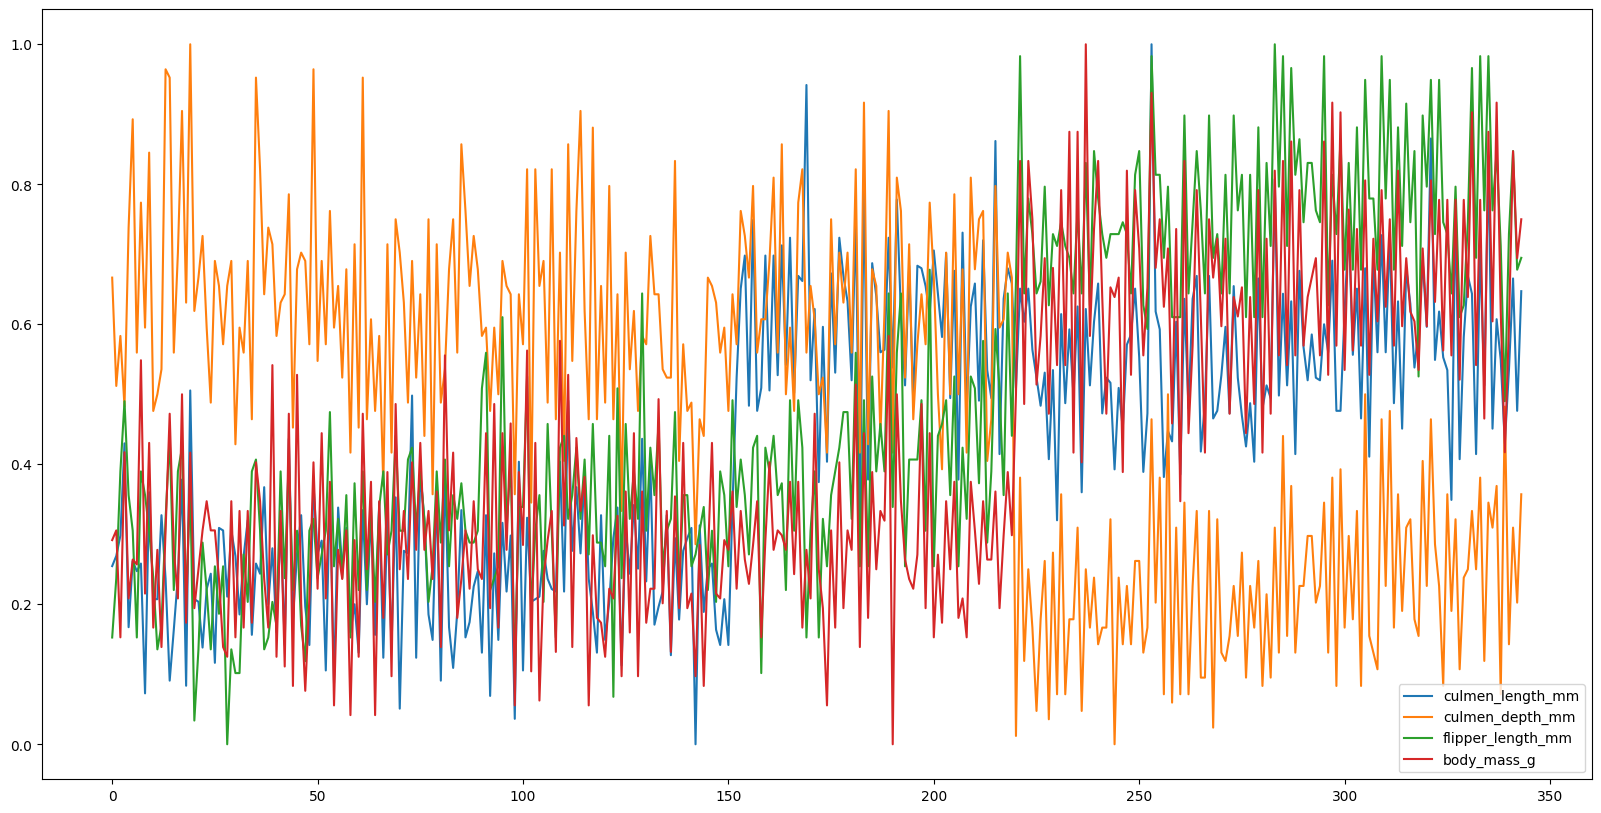

In [ ]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
darba_datu_kopa_vizualizacijai = darba_datu_kopa[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]
#Vērtību attēlojuma izvade
darba_datu_kopa_vizualizacijai.plot(figsize=(20,10))

Vērtību attēlojums ļauj veikt šādus secinājumus:
- kad kulmena dziļums ir lielāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa samazinās (vērtības ir <0.4)
- kad kulmena dziļums ir ap 0.5, tad arī kulmena garums, pleznas garums un ķermeņa masa ir ap to pašu vērtību (viss saplūst kopā)
- kad kulmena dziļums ir mazāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa pieaug (vērtības ir >0.4)
- vispārīgi kulmena garums, pleznas garums un ķermeņa masa mainās kopā un, iespējams, tieši šie atribūti ļaus vislabāk atdalīt klases tālākajā klasifikācijas uzdevumā

### Histogrammu analīze

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>,
        <Axes: title={'center': 'flipper_length_mm'}>],
       [<Axes: title={'center': 'body_mass_g'}>,
        <Axes: title={'center': 'species_cat'}>,
        <Axes: title={'center': 'island_cat'}>],
       [<Axes: title={'center': 'sex_cat'}>, <Axes: >, <Axes: >]],
      dtype=object)

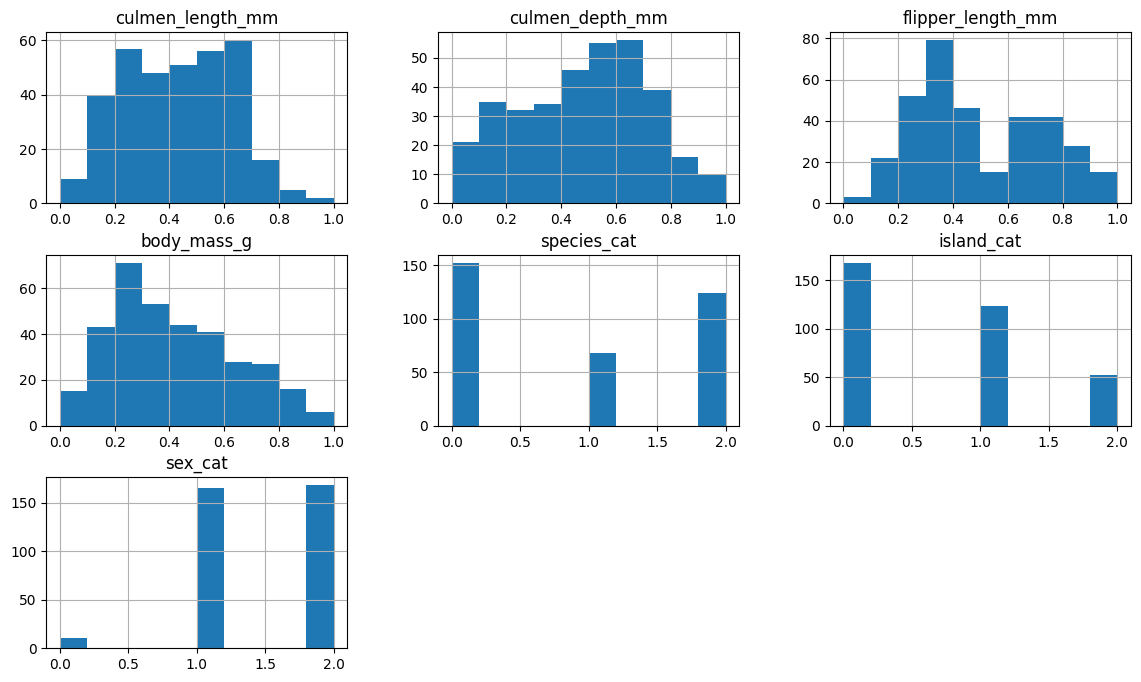

In [ ]:
#Datu kopas atribūtu histogrammu izvade
darba_datu_kopa.hist(figsize=(14,8))

Histogrammās redzam, ka viena no pingvīnu sugām ir mazāk pārstāvēta. Tas nozīmē, ka datu kopā pieejamās klases nav sabalansētas. Tas pats ir novērojams saistībā ar salām, no kurām pingvīni nāk: viena no tām ir mazāk pārstāvēta.
Pie tam datu kopā ir vairāk pingvīnu ar mazāku ķermeņa masu un vairāk pingvīnu ar garāko kulmenu un vairāk pingvīnu ar mazāko pleznas garumu.

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

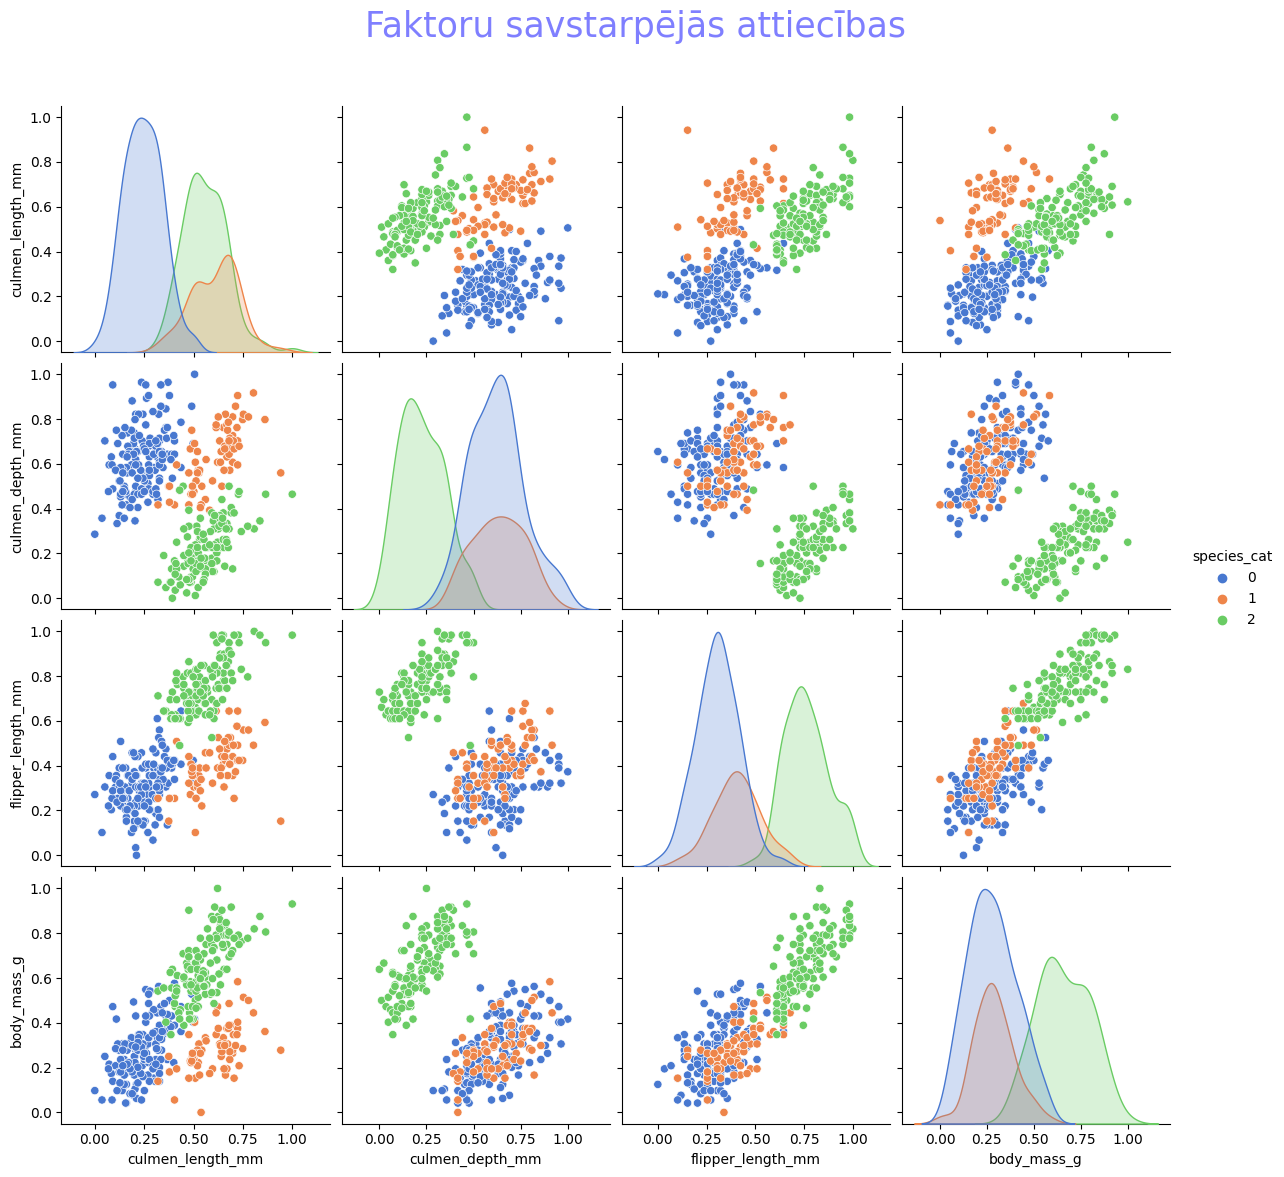

In [ ]:
#Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='species_cat',palette="muted",height=3,vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Faktoru sadalījumi tiek pētīti, par pamatu izmantojot pingvīnu sugas. Grafiki ļauj secināt, ka šādi atribūtu pāri nodrošina pietiekami labu klašu atdalamību:
*	"culmen_length_mm" un "culmen_depth_mm" 
*	"culmen_length_mm" un "flipper_lenght_mm”
un tos var izmantot klasifikācijas uzdevumā.

Savukārt šādi atribūtu pāri nenodrošina labu klašu atdalamību:
*	"culmen_length_mm" un "body_mass_g": zilie datu objekti daļēji saplūst ar zaļajiem datu objektiem un labi atdalāmi ir tikai oranžie datu objekti
*	"culmen_depth_mm" un "flipper_length_mm": zilie datu objekti saplūst ar oranžajiem, tikai zaļie datu objekti ir labi atdalāmi
*	"culmen_depth_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi
*	"flipper_length_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi 

### Atribūtu savstarpējā korelācija

<Axes: >

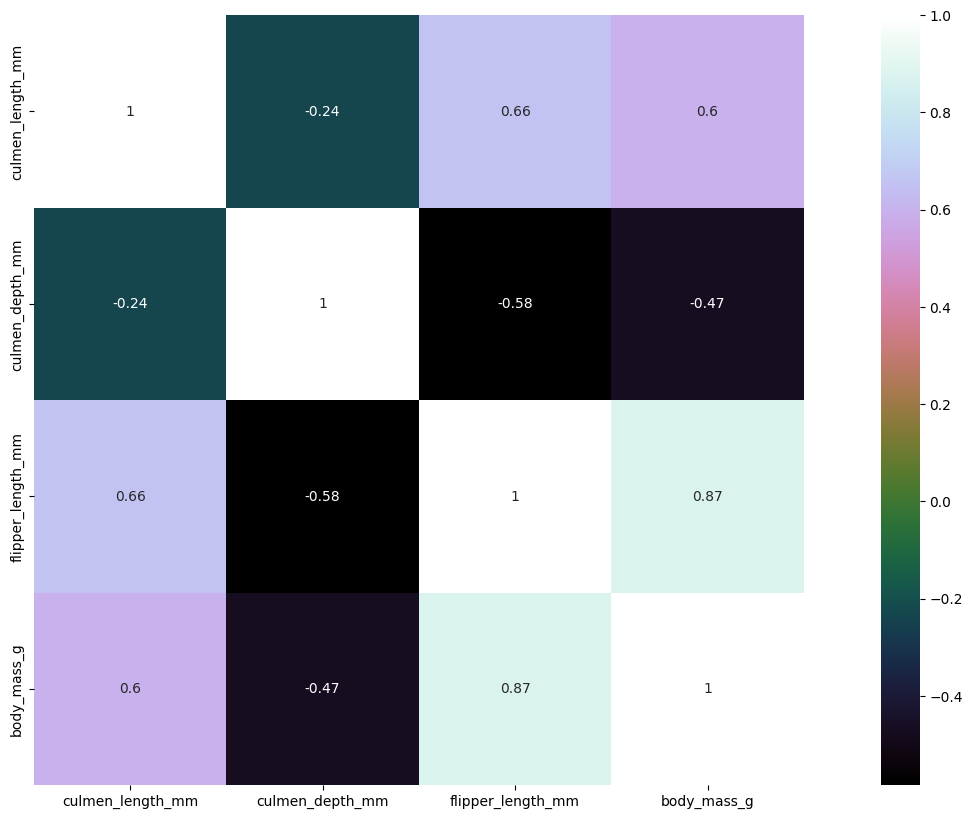

In [ ]:
#Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica=darba_datu_kopa_vizualizacijai.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica,vmax=1,square=True,annot=True,cmap='cubehelix')

Korelācijas matricas analīze ļauj secināt, ka:
* starp atribūtiem “culmen_length_mm” un “culmen_depth_mm” ir vāja negatīva korelācija
* atribūtam “culmen_length_mm” ir vidējā pozitīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* atribūtam “culmen_depth_mm” ir vidējā negatīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* starp atribūtiem “flipper_length_mm” un “body_mass_g” ir augsta pozitīva korelācija

Tādējādi saistībā ar pēdējiem diviem atribūtiem var paredzēt multikolinearitātes problēmu, kas var apgrūtināt atsevišķu mašīnmācīšanās rezultātu interpretāciju, līdz ar to tālākajā analīzē nebūtu vēlams abus šos atribūtus iekļaut.

K-vidējo algoritms
---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


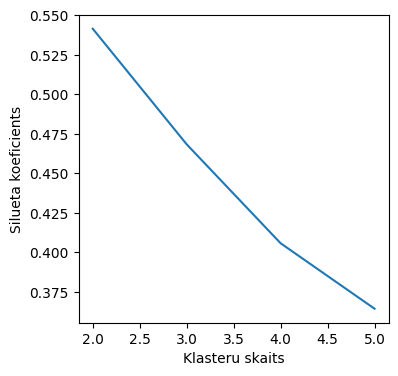

In [ ]:
#algoritma izmantošanai nepieciešamo bibliotēku ielāde
from sklearn.cluster import KMeans
from sklearn import metrics
#tiek atlasīta datu kopa klasterizācijas uzdevumam, ietverot tajā 3 atribūtus no normalizētas datu kopas
darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
#Silueta koeficienta vērtību saraksta izveide
Silueta_koeficients = []
#tiek realizēts cikls ar 6 iterācijām (6 dažādām klasteru skaita vērtībām)
#šajā gadījumā 1 klasteris netiek apskatīts, jo tam nav jēgas silueta koeficienta aprēķinā
for i in range(2,6):
   #Kmeans klasterizācijas modeļa izveide, kur veidojamo klasteru skaits (n_clusters) ir vienāds ar cikla iterācijas numuru (2, 3..) 
   kmeans_modelis = KMeans(n_clusters = i, init = "k-means++")
   #Kmeans modeļa apmācība, izmantojot atlasīto datu kopu ar trim atribūtiem
   kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
   #Silueta koeficients tiek aprēķināts, ņemot par pamatu iepriekš atlasīto datu kopu ar trim atribūtiem no normalizētas datu kopas
   Silueta_koeficients.append(metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_))
#iegūto rezultātu vizuālā attēlošana
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


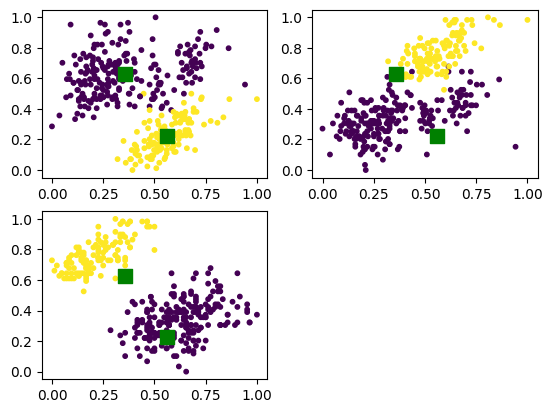

In [ ]:
#lai izvadītu kalsterizācijas rezultātus, tiek pievienota papildu bibliotēka
import matplotlib.pyplot as plt
#tiek izveidots un apmācīts K-vidējo algoritma nodelis ar 2 klasteriem, izmantojot iepriekš izveidoto datu apakškopu ar 3 atribūtiem
kmeans_modelis = KMeans(n_clusters=2, init = "k-means++").fit(darba_datu_kopa_klasterizacijai_3_pazimes)
#tiek iegūti klasteru centri
centroids = kmeans_modelis.cluster_centers_
#izveidojam prognozes datu objektu piederībai klasteriem
ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_3_pazimes)
#atspoguļojam klasterizācijas rezultātus izkliedes diagrammās
plt.subplot(2,2,1)                            # Izveido attēlu matricā (2 x 2), indekss sākas ar 1 kreisajā augšējā stūrī 
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_length_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['culmen_depth_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_length_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['flipper_length_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_depth_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['flipper_length_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.show()

Hierarhiskā aglomeratīvā klasterēšana
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering
#algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 3 atribūtiem
clustering = AgglomerativeClustering().fit(darba_datu_kopa_klasterizacijai_3_pazimes)

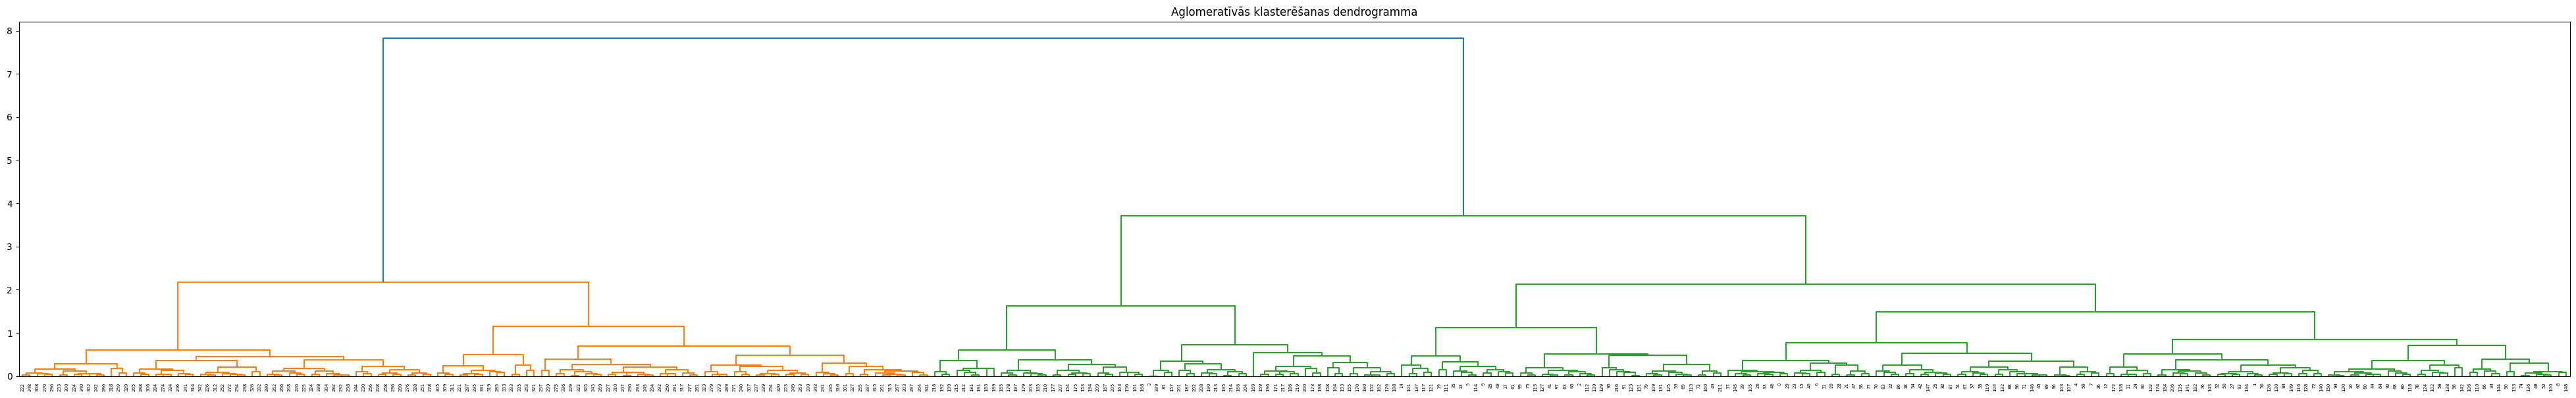

In [ ]:
#dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc
#dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize =(50, 7))
plt.title('Aglomeratīvās klasterēšanas dendrogramma')
Dendrogram = shc.dendrogram((shc.linkage(darba_datu_kopa_klasterizacijai_3_pazimes, method ='ward')))

Mākslīgo neironu tīkli
---

In [ ]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
#atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
izejas = darba_datu_kopa['species_cat']
#uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
apmacibas_datu_proporcija = 0.7
#tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(darba_datu_kopa_klasterizacijai_3_pazimes, izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)

####**1.modelis** - 2 slāņi ar 100 neironiem katrā

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neural_network import MLPClassifier
#izveidojam mākslīgo neironu tīkla modeli ar 2 slāņiem, katrā no kuriem ir 100 neironi
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 1000, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.1 un apmācības iterāciju izvade
neironu_tikla_modelis = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

Iteration 1, loss = 1.06319330
Iteration 2, loss = 1.21708788
Iteration 3, loss = 1.06020003
Iteration 4, loss = 1.09431738
Iteration 5, loss = 1.05500984
Iteration 6, loss = 1.09195059
Iteration 7, loss = 1.12772576
Iteration 8, loss = 1.06096475
Iteration 9, loss = 1.05947884
Iteration 10, loss = 1.08158731
Iteration 11, loss = 1.05400761
Iteration 12, loss = 1.17765433
Iteration 13, loss = 1.08269839
Iteration 14, loss = 1.10510265
Iteration 15, loss = 1.07440377
Iteration 16, loss = 1.05947451
Iteration 17, loss = 1.06029018
Iteration 18, loss = 1.07317258
Iteration 19, loss = 1.19823788
Iteration 20, loss = 1.11407846
Iteration 21, loss = 1.11665739
Iteration 22, loss = 1.22160513
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        50
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        34

    accuracy                           0.48       104
   macro avg       0.16      0.33      0.22       104
weighted avg       0.23      0.48      0.31       104



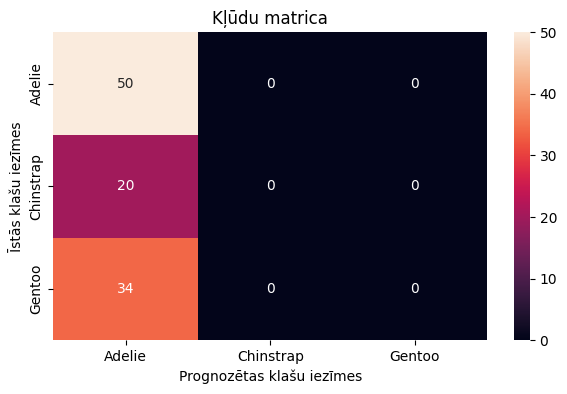

In [ ]:
#bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#izmantojam apmācīto modeli ar testa kopu, lai iegūtu prognozes
y_prognoze = neironu_tikla_modelis.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka 54 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan maza - 48%.

####**2.modelis** -viens slānis ar 5 neironiem 

In [ ]:
#izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 50, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
neironu_tikla_modelis_1_slanis = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       0.93      0.70      0.80        20
           2       0.97      1.00      0.99        34

    accuracy                           0.93       104
   macro avg       0.94      0.89      0.91       104
weighted avg       0.93      0.93      0.93       104



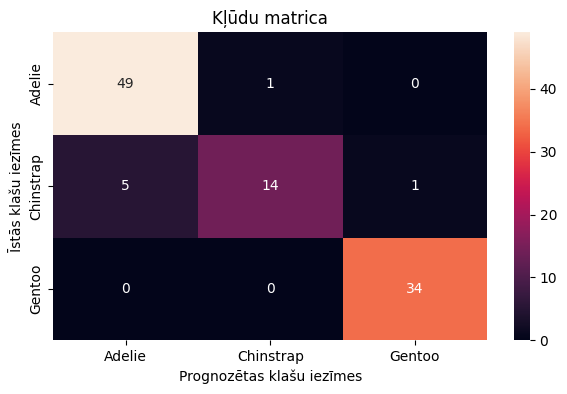

In [ ]:
y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
print(classification_report(y_testa,y_prognoze_1_slanis, zero_division=0))
kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka tikai 4 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan augsta - 96%.
Tādējādi šis modelis ir labāks par iepriekšējo

kNN algoritms
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neighbors import KNeighborsClassifier
#Tiek izveidots algoritma modelis ar 5 kaimiņiem
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Padodam izveidotajam modelim apmācības datu kopu
KNN_MODEL.fit(X_apmacibas, y_apmacibas)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        34

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



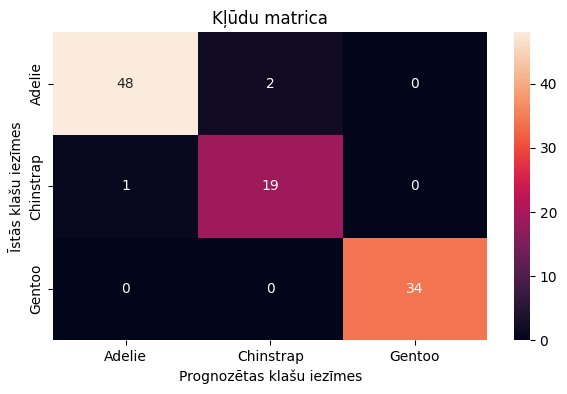

In [ ]:
#Nosakam klases iezīmes testa datu kopas datu objektiem
y_prognoze_knn = KNN_MODEL.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze_knn, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze_knn)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka tikai 3 datu objekti tika klasificēti nepareizi, līdz ar to kopējā algoritma precizitāte ir diezgan augsta - 97%.Tā ir pat nedaudz augstākā nekā neironu tīkla modelim